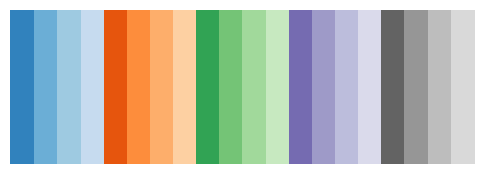

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import pandas as pd

current_path = os.getcwd()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))

# Create a colormap using tab20b
cmap = plt.get_cmap('tab20c')

# Create a gradient image using numpy
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Stack to make it visible

# Plot the gradient image with the tab20b colormap
ax.imshow(gradient, aspect='auto', cmap=cmap)

# Remove axis for better visibility of the colormap
ax.set_axis_off()

# Display the colormap
plt.show()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [76]:
models_m = ['center', 'cnnet', 'svr', 'vergence']
models_d = ['center', 'cnnetdiopters', 'svr', 'vergence']

y_pred_m = []
y_test_m = []
y_pred_d = []
y_test_d = []
errors_m = []
errors_d = []

for i, model in enumerate(models_m):
    path = current_path + '\\' + model
    y_pred_m.append(np.load(os.path.join(path, 'y_pred.npy')))
    y_pred_m[-1] = np.clip(y_pred_m[-1], 0, 20)
    y_test_m.append(np.load(os.path.join(path, 'y_test.npy')))
    errors_m.append(y_pred_m[-1] - y_test_m[-1])

for i, model in enumerate(models_d):
    path = current_path + '\\' + model
    y_pred_d.append(np.load(os.path.join(path, 'y_pred.npy')))
    y_pred_d[-1] = 1 / np.clip(y_pred_d[-1], 0, 20)
    y_test_d.append(1 / np.load(os.path.join(path, 'y_test.npy')))
    errors_d.append(y_pred_d[-1] - y_test_d[-1])

C:\Users\admin\AppData\Local\Temp\ipykernel_22320\823391826.py:21: RuntimeWarning: divide by zero encountered in divide
  y_pred_d[-1] = 1 / np.clip(y_pred_d[-1], 0, 20)


In [77]:
df_cnn = pd.DataFrame({'y_test': y_test_m[1], 'y_pred': y_pred_m[1], 'error': errors_m[1], 'y_test_d': y_test_d[1], 'y_pred_d': y_pred_d[1], 'error_d': errors_d[1]}).sort_values(by='y_test')
df_center = pd.DataFrame({'y_test': y_test_m[0], 'y_pred': y_pred_m[0], 'error': errors_m[0], 'y_test_d': y_test_d[0], 'y_pred_d': y_pred_d[0], 'error_d': errors_d[0]}).sort_values(by='y_test')
df_svr = pd.DataFrame({'y_test': y_test_m[2], 'y_pred': y_pred_m[2], 'error': errors_m[2], 'y_test_d': y_test_d[2], 'y_pred_d': y_pred_d[2], 'error_d': errors_d[2]}).sort_values(by='y_test')
df_vergence = pd.DataFrame({'y_test': y_test_m[3], 'y_pred': y_pred_m[3], 'error': errors_m[3], 'y_test_d': y_test_d[3], 'y_pred_d': y_pred_d[3], 'error_d': errors_d[3]}).sort_values(by='y_test')

In [78]:
display(df_cnn)	
display(df_center)
display(df_svr)
display(df_vergence)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d
14602,0.294071,0.393934,0.099863,3.400540,3.053009,-0.347531
14597,0.294277,0.397327,0.103050,3.398158,3.097814,-0.300344
14568,0.294829,0.377257,0.082429,3.391802,3.180115,-0.211687
14573,0.294829,0.364448,0.069619,3.391792,3.205027,-0.186764
14600,0.294873,0.412072,0.117199,3.391294,3.032520,-0.358774
...,...,...,...,...,...,...
15975,15.351936,16.584572,1.232635,0.065138,0.065101,-0.000038
15973,15.352018,16.533663,1.181644,0.065138,0.066462,0.001324
15974,15.352022,16.432072,1.080050,0.065138,0.070549,0.005411
15972,15.352047,16.191853,0.839806,0.065138,0.069201,0.004063


,y_test,y_pred,error,y_test_d,y_pred_d,error_d
21881,0.178506,0.178686,0.000181,5.602054,5.596394,-0.005660
21887,0.178563,0.178968,0.000405,5.600269,5.587584,-0.012685
21880,0.178600,0.178739,0.000139,5.599089,5.594735,-0.004354
21885,0.178722,0.178978,0.000256,5.595275,5.587275,-0.008000
21886,0.180424,0.180495,0.000071,5.542505,5.540328,-0.002177
...,...,...,...,...,...,...
16174,15.354519,15.308220,-0.046299,0.065127,0.065324,0.000197
16180,15.354521,15.315554,-0.038967,0.065127,0.065293,0.000166
16175,15.354559,15.317874,-0.036685,0.065127,0.065283,0.000156
16179,15.354833,15.330129,-0.024704,0.065126,0.065231,0.000105


,y_test,y_pred,error,y_test_d,y_pred_d,error_d
25206,0.179999,0.045975,-0.134024,5.555582,21.750819,16.195237
21729,0.180209,0.049374,-0.130835,5.549104,20.253661,14.704557
23668,0.182223,0.120877,-0.061346,5.487783,8.272870,2.785087
21740,0.182240,0.090942,-0.091298,5.487255,10.996002,5.508747
8947,0.183251,0.158649,-0.024602,5.456982,6.303223,0.846241
...,...,...,...,...,...,...
15942,15.351937,12.498694,-2.853243,0.065138,0.080008,0.014870
23284,15.351961,12.476784,-2.875177,0.065138,0.080149,0.015011
19491,15.351981,12.040813,-3.311168,0.065138,0.083051,0.017913
22261,15.351987,12.500958,-2.851028,0.065138,0.079994,0.014856


,y_test,y_pred,error,y_test_d,y_pred_d,error_d
21881,0.178506,0.149881,-0.028625,5.602054,6.671952,1.069897
21887,0.178563,0.147788,-0.030775,5.600269,6.766437,1.166168
21880,0.178600,0.149721,-0.028880,5.599089,6.679105,1.080015
21885,0.178722,0.153738,-0.024984,5.595275,6.504578,0.909303
21886,0.180424,0.151104,-0.029319,5.542505,6.617942,1.075438
...,...,...,...,...,...,...
16174,15.354519,2.320501,-13.034018,0.065127,0.430941,0.365814
16180,15.354521,4.750520,-10.604001,0.065127,0.210503,0.145376
16175,15.354559,6.087014,-9.267545,0.065127,0.164284,0.099157
16179,15.354833,1.598951,-13.755882,0.065126,0.625410,0.560284


In [79]:
# compute rolling median of y_pred
window_size = 100
df_cnn['y_pred_rolling'] = df_cnn['y_pred'].rolling(window=window_size, center=True).median()
df_center['y_pred_rolling'] = df_center['y_pred'].rolling(window=window_size, center=True).median()
df_svr['y_pred_rolling'] = df_svr['y_pred'].rolling(window=window_size, center=True).median()
df_vergence['y_pred_rolling'] = df_vergence['y_pred'].rolling(window=window_size, center=True).median()

# do the same for error
df_cnn['error_rolling'] = df_cnn['error'].rolling(window=window_size, center=True).median()
df_center['error_rolling'] = df_center['error'].rolling(window=window_size, center=True).median()
df_svr['error_rolling'] = df_svr['error'].rolling(window=window_size, center=True).median()
df_vergence['error_rolling'] = df_vergence['error'].rolling(window=window_size, center=True).median()

# filter all NaNs
df_cnn = df_cnn.dropna()
df_center = df_center.dropna()
df_svr = df_svr.dropna()
df_vergence = df_vergence.dropna()

In [80]:
display(df_cnn)	
display(df_center)
display(df_svr)
display(df_vergence)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling
22958,0.322523,0.315863,-0.006660,3.100558,3.016640,-0.083918,0.365709,0.055784
22957,0.322531,0.333247,0.010716,3.100477,2.996495,-0.103982,0.365709,0.055784
22959,0.322550,0.320860,-0.001690,3.100291,3.012011,-0.088280,0.365709,0.055784
22955,0.322629,0.356050,0.033421,3.099537,2.971853,-0.127684,0.365709,0.055784
22950,0.322678,0.311721,-0.010957,3.099063,3.035927,-0.063136,0.366080,0.055784
...,...,...,...,...,...,...,...,...
21182,15.336704,16.323891,0.987186,0.065203,0.080948,0.015745,16.444300,1.117749
21184,15.336770,16.128553,0.791783,0.065203,0.080931,0.015728,16.444300,1.117749
21189,15.336775,16.482521,1.145746,0.065203,0.079971,0.014768,16.449961,1.117749
21186,15.336886,16.352880,1.015994,0.065202,0.079579,0.014377,16.449961,1.117749


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling
6417,0.292317,0.292074,-0.000243,3.420942,3.423794,0.002852,0.292239,0.000165
6387,0.293201,0.293185,-0.000016,3.410632,3.410815,0.000183,0.292661,0.000165
82984,0.293701,0.293056,-0.000645,3.404825,3.412315,0.007491,0.293121,0.000151
6384,0.293951,0.293989,0.000039,3.401931,3.401482,-0.000449,0.293587,0.000165
59545,0.294785,0.294875,0.000089,3.392298,3.391271,-0.001027,0.294284,0.000165
...,...,...,...,...,...,...,...,...
93932,15.347769,15.216908,-0.130860,0.065156,0.065716,0.000560,15.307092,-0.041210
48776,15.347920,15.482343,0.134424,0.065155,0.064590,-0.000566,15.308392,-0.042562
48773,15.347951,15.431159,0.083208,0.065155,0.064804,-0.000351,15.308392,-0.042562
102282,15.347959,15.421808,0.073849,0.065155,0.064843,-0.000312,15.309003,-0.037826


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling
1499,0.315533,0.278957,-0.036576,3.169242,3.584785,0.415543,0.275569,-0.039482
26380,0.317322,0.283935,-0.033387,3.151372,3.521930,0.370558,0.276358,-0.039482
23416,0.317729,0.282838,-0.034891,3.147338,3.535590,0.388252,0.276823,-0.039482
4509,0.317867,0.279077,-0.038790,3.145974,3.583243,0.437268,0.277107,-0.039482
23518,0.318022,0.278977,-0.039045,3.144435,3.584523,0.440088,0.277263,-0.039482
...,...,...,...,...,...,...,...,...
10622,15.336219,12.687303,-2.648916,0.065205,0.078819,0.013614,12.003805,-3.339578
6149,15.336234,11.961238,-3.374997,0.065205,0.083603,0.018398,12.007221,-3.334478
14954,15.336261,11.825778,-3.510483,0.065205,0.084561,0.019356,12.013782,-3.327797
4968,15.336261,12.080643,-3.255618,0.065205,0.082777,0.017572,12.021494,-3.320311


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling
6417,0.292317,0.291989,-0.000328,3.420942,3.424788,0.003845,0.288750,-0.005574
6387,0.293201,0.282101,-0.011100,3.410632,3.544833,0.134201,0.288981,-0.005383
82984,0.293701,0.330191,0.036490,3.404825,3.028554,-0.376270,0.289150,-0.005383
6384,0.293951,0.273356,-0.020595,3.401931,3.658231,0.256301,0.289329,-0.005188
59545,0.294785,0.308045,0.013259,3.392298,3.246283,-0.146015,0.289394,-0.005015
...,...,...,...,...,...,...,...,...
93932,15.347769,3.508467,-11.839302,0.065156,0.285025,0.219869,2.480893,-12.871266
48776,15.347920,7.202020,-8.145900,0.065155,0.138850,0.073695,2.653751,-12.693545
48773,15.347951,8.479566,-6.868385,0.065155,0.117931,0.052775,2.750933,-12.595590
102282,15.347959,3.628730,-11.719229,0.065155,0.275579,0.210423,2.750933,-12.595590


In [81]:
binsize_m = 0.5
binsize_d = 0.2

max_dist = 7

# add column with respective bin id to each dataframe, depending on y_test and which bin interval it falls into, use lower bin edge as bin id
df_center['bin_m'] = np.floor(df_center['y_test'] / binsize_m) * binsize_m
df_center['bin_d'] = np.floor(df_center['y_test_d'] / binsize_d) * binsize_d

df_svr['bin_m'] = np.floor(df_svr['y_test'] / binsize_m) * binsize_m
df_svr['bin_d'] = np.floor(df_svr['y_test_d'] / binsize_d) * binsize_d

df_vergence['bin_m'] = np.floor(df_vergence['y_test'] / binsize_m) * binsize_m
df_vergence['bin_d'] = np.floor(df_vergence['y_test_d'] / binsize_d) * binsize_d

df_cnn['bin_m'] = np.floor(df_cnn['y_test'] / binsize_m) * binsize_m
df_cnn['bin_d'] = np.floor(df_cnn['y_test_d'] / binsize_d) * binsize_d

# assign everything to bin_d = 3, if y_test_d >= 3
df_center.loc[df_center['y_test_d'] >= 3, 'bin_d'] = 3
df_svr.loc[df_svr['y_test_d'] >= 3, 'bin_d'] = 3
df_vergence.loc[df_vergence['y_test_d'] >= 3, 'bin_d'] = 3
df_cnn.loc[df_cnn['y_test_d'] >= 3, 'bin_d'] = 3

df_center.loc[df_center['y_test'] >= 7, 'bin_m'] = 7
df_svr.loc[df_svr['y_test'] >= 7, 'bin_m'] = 7
df_vergence.loc[df_vergence['y_test'] >= 7, 'bin_m'] = 7
df_cnn.loc[df_cnn['y_test'] >= 7, 'bin_m'] = 7

display(df_center)
display(df_svr)
display(df_vergence)
display(df_cnn)

,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling,bin_m,bin_d
6417,0.292317,0.292074,-0.000243,3.420942,3.423794,0.002852,0.292239,0.000165,0.0,3.0
6387,0.293201,0.293185,-0.000016,3.410632,3.410815,0.000183,0.292661,0.000165,0.0,3.0
82984,0.293701,0.293056,-0.000645,3.404825,3.412315,0.007491,0.293121,0.000151,0.0,3.0
6384,0.293951,0.293989,0.000039,3.401931,3.401482,-0.000449,0.293587,0.000165,0.0,3.0
59545,0.294785,0.294875,0.000089,3.392298,3.391271,-0.001027,0.294284,0.000165,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
93932,15.347769,15.216908,-0.130860,0.065156,0.065716,0.000560,15.307092,-0.041210,7.0,0.0
48776,15.347920,15.482343,0.134424,0.065155,0.064590,-0.000566,15.308392,-0.042562,7.0,0.0
48773,15.347951,15.431159,0.083208,0.065155,0.064804,-0.000351,15.308392,-0.042562,7.0,0.0
102282,15.347959,15.421808,0.073849,0.065155,0.064843,-0.000312,15.309003,-0.037826,7.0,0.0


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling,bin_m,bin_d
1499,0.315533,0.278957,-0.036576,3.169242,3.584785,0.415543,0.275569,-0.039482,0.0,3.0
26380,0.317322,0.283935,-0.033387,3.151372,3.521930,0.370558,0.276358,-0.039482,0.0,3.0
23416,0.317729,0.282838,-0.034891,3.147338,3.535590,0.388252,0.276823,-0.039482,0.0,3.0
4509,0.317867,0.279077,-0.038790,3.145974,3.583243,0.437268,0.277107,-0.039482,0.0,3.0
23518,0.318022,0.278977,-0.039045,3.144435,3.584523,0.440088,0.277263,-0.039482,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
10622,15.336219,12.687303,-2.648916,0.065205,0.078819,0.013614,12.003805,-3.339578,7.0,0.0
6149,15.336234,11.961238,-3.374997,0.065205,0.083603,0.018398,12.007221,-3.334478,7.0,0.0
14954,15.336261,11.825778,-3.510483,0.065205,0.084561,0.019356,12.013782,-3.327797,7.0,0.0
4968,15.336261,12.080643,-3.255618,0.065205,0.082777,0.017572,12.021494,-3.320311,7.0,0.0


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling,bin_m,bin_d
6417,0.292317,0.291989,-0.000328,3.420942,3.424788,0.003845,0.288750,-0.005574,0.0,3.0
6387,0.293201,0.282101,-0.011100,3.410632,3.544833,0.134201,0.288981,-0.005383,0.0,3.0
82984,0.293701,0.330191,0.036490,3.404825,3.028554,-0.376270,0.289150,-0.005383,0.0,3.0
6384,0.293951,0.273356,-0.020595,3.401931,3.658231,0.256301,0.289329,-0.005188,0.0,3.0
59545,0.294785,0.308045,0.013259,3.392298,3.246283,-0.146015,0.289394,-0.005015,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
93932,15.347769,3.508467,-11.839302,0.065156,0.285025,0.219869,2.480893,-12.871266,7.0,0.0
48776,15.347920,7.202020,-8.145900,0.065155,0.138850,0.073695,2.653751,-12.693545,7.0,0.0
48773,15.347951,8.479566,-6.868385,0.065155,0.117931,0.052775,2.750933,-12.595590,7.0,0.0
102282,15.347959,3.628730,-11.719229,0.065155,0.275579,0.210423,2.750933,-12.595590,7.0,0.0


,y_test,y_pred,error,y_test_d,y_pred_d,error_d,y_pred_rolling,error_rolling,bin_m,bin_d
22958,0.322523,0.315863,-0.006660,3.100558,3.016640,-0.083918,0.365709,0.055784,0.0,3.0
22957,0.322531,0.333247,0.010716,3.100477,2.996495,-0.103982,0.365709,0.055784,0.0,3.0
22959,0.322550,0.320860,-0.001690,3.100291,3.012011,-0.088280,0.365709,0.055784,0.0,3.0
22955,0.322629,0.356050,0.033421,3.099537,2.971853,-0.127684,0.365709,0.055784,0.0,3.0
22950,0.322678,0.311721,-0.010957,3.099063,3.035927,-0.063136,0.366080,0.055784,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
21182,15.336704,16.323891,0.987186,0.065203,0.080948,0.015745,16.444300,1.117749,7.0,0.0
21184,15.336770,16.128553,0.791783,0.065203,0.080931,0.015728,16.444300,1.117749,7.0,0.0
21189,15.336775,16.482521,1.145746,0.065203,0.079971,0.014768,16.449961,1.117749,7.0,0.0
21186,15.336886,16.352880,1.015994,0.065202,0.079579,0.014377,16.449961,1.117749,7.0,0.0


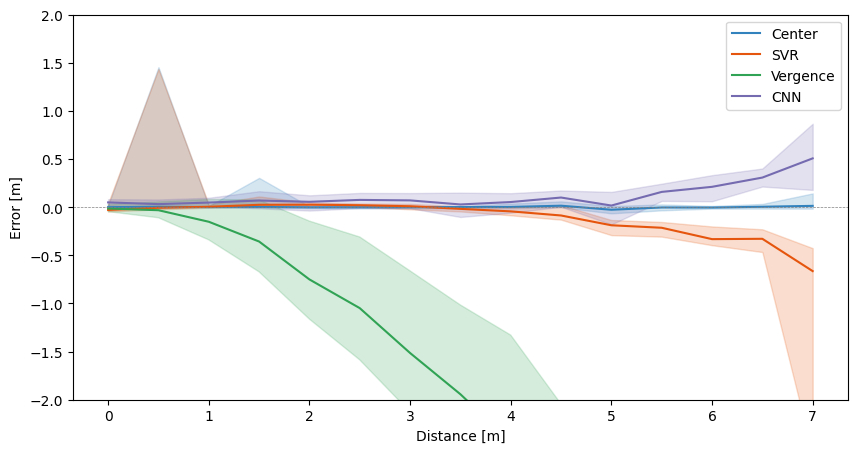

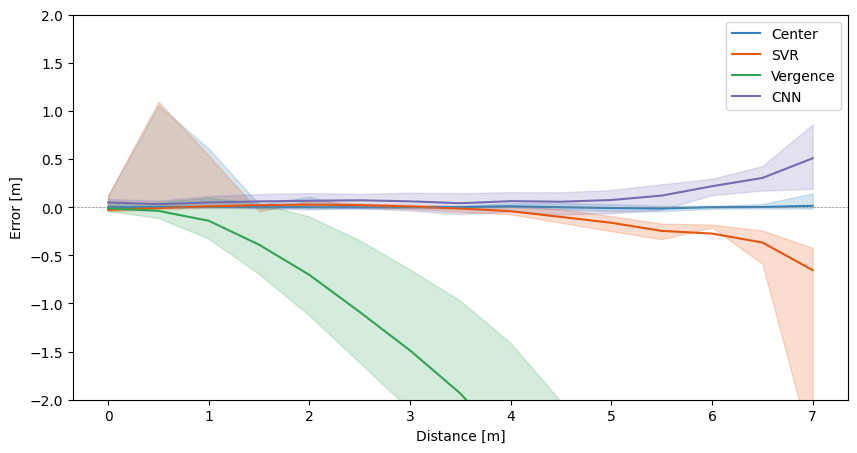

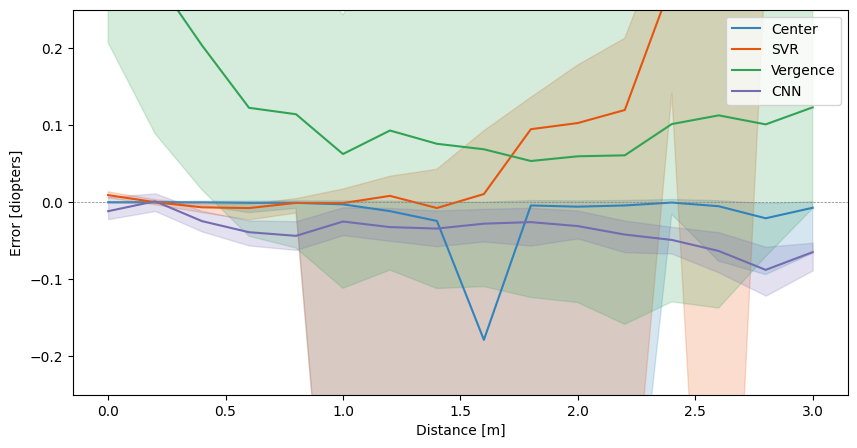

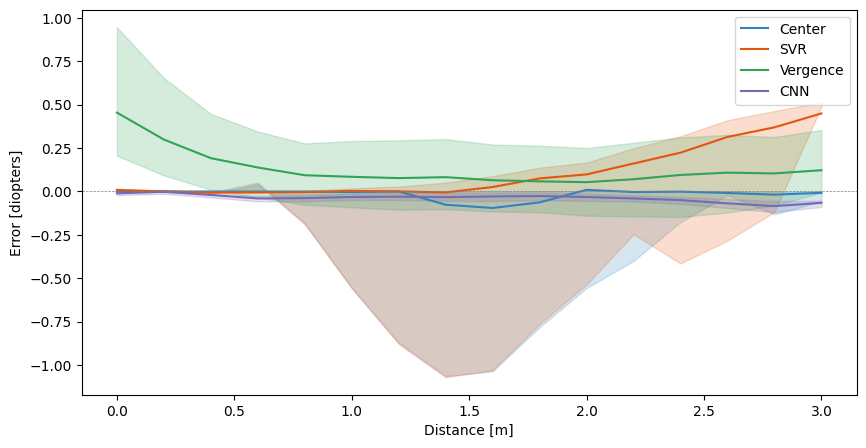

In [82]:
# compute mean and percentiles of errors for each bin, for each model
mean_error_center = df_center.groupby('bin_m')['error'].quantile(0.5)
mean_error_svr = df_svr.groupby('bin_m')['error'].quantile(0.5)
mean_error_vergence = df_vergence.groupby('bin_m')['error'].quantile(0.5)
mean_error_cnn = df_cnn.groupby('bin_m')['error'].quantile(0.5)

percentile_25_center = df_center.groupby('bin_m')['error'].quantile(0.25)
percentile_25_svr = df_svr.groupby('bin_m')['error'].quantile(0.25)
percentile_25_vergence = df_vergence.groupby('bin_m')['error'].quantile(0.25)
percentile_25_cnn = df_cnn.groupby('bin_m')['error'].quantile(0.25)

percentile_75_center = df_center.groupby('bin_m')['error'].quantile(0.75)
percentile_75_svr = df_svr.groupby('bin_m')['error'].quantile(0.75)
percentile_75_vergence = df_vergence.groupby('bin_m')['error'].quantile(0.75)
percentile_75_cnn = df_cnn.groupby('bin_m')['error'].quantile(0.75)

mean_error_center_d = df_center.groupby('bin_d')['error_d'].quantile(0.5)
mean_error_svr_d = df_svr.groupby('bin_d')['error_d'].quantile(0.5)
mean_error_vergence_d = df_vergence.groupby('bin_d')['error_d'].quantile(0.5)
mean_error_cnn_d = df_cnn.groupby('bin_d')['error_d'].quantile(0.5)

percentile_25_center_d = df_center.groupby('bin_d')['error_d'].quantile(0.25)
percentile_25_svr_d = df_svr.groupby('bin_d')['error_d'].quantile(0.25)
percentile_25_vergence_d = df_vergence.groupby('bin_d')['error_d'].quantile(0.25)
percentile_25_cnn_d = df_cnn.groupby('bin_d')['error_d'].quantile(0.25)

percentile_75_center_d = df_center.groupby('bin_d')['error_d'].quantile(0.75)
percentile_75_svr_d = df_svr.groupby('bin_d')['error_d'].quantile(0.75)
percentile_75_vergence_d = df_vergence.groupby('bin_d')['error_d'].quantile(0.75)
percentile_75_cnn_d = df_cnn.groupby('bin_d')['error_d'].quantile(0.75)

# plot mean and percentiles of errors for each bin, for each model
plt.figure(figsize=(10, 5))
plt.plot(mean_error_center.index, mean_error_center, label='Center', color=cmap(0))
plt.fill_between(mean_error_center.index, percentile_25_center, percentile_75_center, alpha=0.2, color=cmap(0))

plt.plot(mean_error_svr.index, mean_error_svr, label='SVR', color=cmap(4))
plt.fill_between(mean_error_svr.index, percentile_25_svr, percentile_75_svr, alpha=0.2, color=cmap(4))

plt.plot(mean_error_vergence.index, mean_error_vergence, label='Vergence', color=cmap(8))
plt.fill_between(mean_error_vergence.index, percentile_25_vergence, percentile_75_vergence, alpha=0.2, color=cmap(8))

plt.plot(mean_error_cnn.index, mean_error_cnn, label='CNN', color=cmap(12))
plt.fill_between(mean_error_cnn.index, percentile_25_cnn, percentile_75_cnn, alpha=0.2, color=cmap(12))
# add horizontal dashed line at y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.ylim(-2,2)
plt.legend()
plt.show()

# plot the same but smooth the curves
from scipy.signal import savgol_filter

plt.figure(figsize=(10, 5))
plt.plot(mean_error_center.index, savgol_filter(mean_error_center, 5, 3), label='Center', color=cmap(0))
plt.fill_between(mean_error_center.index, savgol_filter(percentile_25_center, 5, 3), savgol_filter(percentile_75_center, 5, 3), alpha=0.2, color=cmap(0))

plt.plot(mean_error_svr.index, savgol_filter(mean_error_svr, 5, 3), label='SVR', color=cmap(4))
plt.fill_between(mean_error_svr.index, savgol_filter(percentile_25_svr, 5, 3), savgol_filter(percentile_75_svr, 5, 3), alpha=0.2, color=cmap(4))

plt.plot(mean_error_vergence.index, savgol_filter(mean_error_vergence, 5, 3), label='Vergence', color=cmap(8))
plt.fill_between(mean_error_vergence.index, savgol_filter(percentile_25_vergence, 5, 3), savgol_filter(percentile_75_vergence, 5, 3), alpha=0.2, color=cmap(8))

plt.plot(mean_error_cnn.index, savgol_filter(mean_error_cnn, 5, 3), label='CNN', color=cmap(12))
plt.fill_between(mean_error_cnn.index, savgol_filter(percentile_25_cnn, 5, 3), savgol_filter(percentile_75_cnn, 5, 3), alpha=0.2, color=cmap(12))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Distance [m]')
plt.ylabel('Error [m]')
plt.ylim(-2,2)
plt.legend()

plt.show()

# do the same for diopters
plt.figure(figsize=(10, 5))
plt.plot(mean_error_center_d.index, mean_error_center_d, label='Center', color=cmap(0))
plt.fill_between(mean_error_center_d.index, percentile_25_center_d, percentile_75_center_d, alpha=0.2, color=cmap(0))

plt.plot(mean_error_svr_d.index, mean_error_svr_d, label='SVR', color=cmap(4))
plt.fill_between(mean_error_svr_d.index, percentile_25_svr_d, percentile_75_svr_d, alpha=0.2, color=cmap(4))

plt.plot(mean_error_vergence_d.index, mean_error_vergence_d, label='Vergence', color=cmap(8))
plt.fill_between(mean_error_vergence_d.index, percentile_25_vergence_d, percentile_75_vergence_d, alpha=0.2, color=cmap(8))

plt.plot(mean_error_cnn_d.index, mean_error_cnn_d, label='CNN', color=cmap(12))
plt.fill_between(mean_error_cnn_d.index, percentile_25_cnn_d, percentile_75_cnn_d, alpha=0.2, color=cmap(12))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Distance [m]')
plt.ylabel('Error [diopters]')
plt.legend()
plt.ylim(-0.25,0.25)

plt.show()

# plot the same but smooth the curves
plt.figure(figsize=(10, 5))
plt.plot(mean_error_center_d.index, savgol_filter(mean_error_center_d, 5, 3), label='Center', color=cmap(0))
plt.fill_between(mean_error_center_d.index, savgol_filter(percentile_25_center_d, 5, 3), savgol_filter(percentile_75_center_d, 5, 3), alpha=0.2, color=cmap(0))

plt.plot(mean_error_svr_d.index, savgol_filter(mean_error_svr_d, 5, 3), label='SVR', color=cmap(4))
plt.fill_between(mean_error_svr_d.index, savgol_filter(percentile_25_svr_d, 5, 3), savgol_filter(percentile_75_svr_d, 5, 3), alpha=0.2, color=cmap(4))

plt.plot(mean_error_vergence_d.index, savgol_filter(mean_error_vergence_d, 5, 3), label='Vergence', color=cmap(8))
plt.fill_between(mean_error_vergence_d.index, savgol_filter(percentile_25_vergence_d, 5, 3), savgol_filter(percentile_75_vergence_d, 5, 3), alpha=0.2, color=cmap(8))

plt.plot(mean_error_cnn_d.index, savgol_filter(mean_error_cnn_d, 5, 3), label='CNN', color=cmap(12))
plt.fill_between(mean_error_cnn_d.index, savgol_filter(percentile_25_cnn_d, 5, 3), savgol_filter(percentile_75_cnn_d, 5, 3), alpha=0.2, color=cmap(12))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Distance [m]')
plt.ylabel('Error [diopters]')
plt.legend()

plt.show()


In [83]:
ids = np.unique(et_data[['target_id', 'scene_id', 'participant_id']].to_numpy(), axis=0)
average_columns = ['left_eye_gaze.x', 'left_eye_gaze.y', 'left_eye_gaze.z', 'right_eye_gaze.x', 'right_eye_gaze.y', 'right_eye_gaze.z', 'left_eye_origin.x', 'left_eye_origin.y', 'left_eye_origin.z', 'right_eye_origin.x', 'right_eye_origin.y', 'right_eye_origin.z']
printProgressBar(0, len(ids), prefix = 'Progress:', suffix = 'Complete', length = 50)

et_data_avg = et_data.copy()

for i in range(len(ids)):
    target_id = ids[i][0]
    scene_id = ids[i][1]
    participant_id = ids[i][2]
    
    # get data for this target, scene and participant
    df_target = et_data_avg[(et_data_avg['target_id'] == target_id) & (et_data_avg['scene_id'] == scene_id) & (et_data_avg['participant_id'] == participant_id)]

    for col in average_columns:
        df_target.loc[:, col] = (
            df_target
            .rolling(window='100ms', on='Timestamp', min_periods=5)
            [col]
            .median()
        )   

    # set et_data to the new values
    et_data_avg.loc[(et_data_avg['target_id'] == target_id) & (et_data_avg['scene_id'] == scene_id) & (et_data_avg['participant_id'] == participant_id), average_columns] = df_target[average_columns]
    
    printProgressBar(i + 1, len(ids), prefix = 'Progress:', suffix = 'Complete', length = 50)

NameError: name 'et_data' is not defined